In [1]:
import pandas as pd
import numpy as np

from imblearn.over_sampling import RandomOverSampler, SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sampler = RandomOverSampler(
    sampling_strategy='auto',
    random_state=123
)

In [3]:
data = pd.read_csv(
    '/home/giorgio/Scrivania/Kaggle/cassava_leaf/data/train_folds.csv'
)

In [4]:
data.columns

Index(['image_id', 'label', 'fold'], dtype='object')

In [18]:
X = data[['image_id', 'fold']].to_numpy()
y = data['label'].to_numpy()

X_res, y_res = sampler.fit_resample(X, y)

<AxesSubplot:ylabel='Density'>

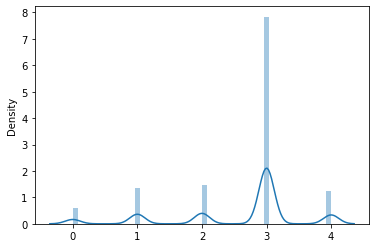

In [19]:
sns.distplot(
    x=y
)

<AxesSubplot:ylabel='Density'>

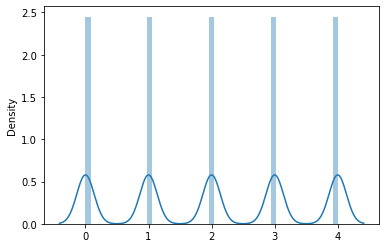

In [20]:
sns.distplot(
    x=y_res
)

In [21]:
y_res.shape

(114390,)

In [22]:
X_res[:, 1].shape

(114390,)

In [23]:
resampled = pd.DataFrame()
resampled['image_id'] = X_res[:, 0]
resampled['fold'] = X_res[:, 1]
resampled['label'] = y_res

In [25]:
resampled.to_csv('/home/giorgio/Scrivania/Kaggle/cassava_leaf/data/train_folds_res.csv')